## Data Collection

In [39]:
#load python packages
import os
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
os.getcwd()

'/Users/shannonballard/Springboard/Springboard_Capstone_2'

In [41]:
path="/Users/shannonballard/Springboard/Springboard_Capstone_2"
os.chdir(path) 

In [42]:
#load the data into pandas df and print the first five rows
nki_bc = pd.read_csv('NKI_breast_cancer.csv')
nki_bc.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


## Data Organization

In [43]:
#Create subfolders called data and figures
folder = '/Users/shannonballard/Springboard/Springboard_Capstone_2/data'
if not (os.path.exists(folder)):
    os.makedirs(folder)
    
folder2 = '/Users/shannonballard/Springboard/Springboard_Capstone_2/figures'
if not (os.path.exists(folder2)):
    os.makedirs(folder2)

In [44]:
os.listdir()

['Capstone_2_Final_Report.pdf',
 'Capstone_2_EDA.ipynb',
 'Untitled1.ipynb',
 'nki_bc_for_model.csv',
 'Capstone_2_Modeling.ipynb',
 'Logistic Regresion Random Forest metrics.png',
 'Untitled3.ipynb',
 'Final Report.ipynb',
 'Untitled.ipynb',
 'Description of Data.png',
 'Logistic Regression Confusion Matrix.png',
 'Logistic Regression features table.png',
 'Untitled2.ipynb',
 'Cox Calibration.png',
 'Ten Features with the Greatest p-values.png',
 'Survival Tiem in Breast Cancer Patients.png',
 'Features pvalue fold dif of 2.png',
 'Fortis Beak Length.png',
 'Logistic Regression Top 10 positive features.png',
 'Capstone_2_Final_Report.ipynb',
 'Survival Analysis Hazard ratio features table.png',
 'figures',
 'Random Forest tuned Top 10 features.png',
 'nki_bc_cleaned.csv',
 'Patient Survival time.png',
 'Capstone_2_Preprocessing and Training Data.ipynb',
 'Random Forest Confusion Matrix.png',
 '.ipynb_checkpoints',
 'table_plotly.png',
 'Gene pairplot.png',
 'Survival Time in Breast Ca

## Data Definition

In [45]:
#Print the columns names
nki_bc.columns

Index(['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence',
       'chemo', 'hormonal', 'amputation', 'histtype',
       ...
       'Contig36312_RC', 'Contig38980_RC', 'NM_000853', 'NM_000854',
       'NM_000860', 'Contig29014_RC', 'Contig46616_RC', 'NM_000888',
       'NM_000898', 'AF067420'],
      dtype='object', length=1570)

In [46]:
#Check associated datatypes with columns
nki_bc_dt = pd.DataFrame(nki_bc.dtypes)
nki_bc_dt = nki_bc_dt.reset_index()
nki_bc_dt.columns = ['Col_name','dtype']
nki_bc_dt

,Col_name,dtype
0,Patient,object
1,ID,int64
2,age,int64
3,eventdeath,int64
4,survival,float64
...,...,...
1565,Contig29014_RC,float64
1566,Contig46616_RC,float64
1567,NM_000888,float64
1568,NM_000898,float64


## Description of Columns

| Variable |Details| Type |
| --- | --- | --- |
|Patient | Patient sample number | Continuous |
|ID | Patient ID | Continuous |
|age | Age at which patient was diagnosed with breast cancer | Continuous |
|eventdeath | 0 = alive, 1 = death | Categorical |
|survival | Time (in years) until death or last follow-up | Continuous |
|timerecurrence | Time (in years) until cancer recurrence or last follow-up | Continuous |
|chemo | chemotherapy used (yes=1/no=0) | Categorical |
|hormonal | Hormonal therapy used (yes=1/no=0) | Categorical |
|amputation | Mastectomy (yes = 1/no = 0) | Categorical |
|histtype | Histological grade based on 3 morphological features | Categorical |
|diam | Diameter of primary tumor | Continuous |
|posnodes | number of lymph nodes that contained cancerous cells | Continuous |
|grade | Pathological grade based on cell differentiation & growth rate (1=low, 2=intermediate, 3=high) | Categorical |
|angioinv | Vascular invasion 1= absent, 2= minor, 3 = major | Categorical |
|lymphinfil | level of lymphocytic infiltration | Categorical |
|barcode | sample barcode | Continuous |
|1,554 gene expression levels | each gene is provided as an individual variable; given as an intensity ratio to that of reference pool | Continuous |

In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(columnwidth = [60,250, 60], header=dict(values=['Variable', 'Details', 'Type']),
                 cells=dict(values=[['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal',
                                    'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil', 'barcode', '1,554 Genes'],
                                    ['Patient sample number', 'Patient ID', 'Age at which patient was diagnosed with breast cancer',
                                    '0 = alive, 1 = death', 'Time (in years) until death or last follow-up', 'Time (in years) until cancer recurrence or last follow-up',
                                    'chemotherapy used (yes=1/no=0)', 'Hormonal therapy used (yes=1/no=0)', 'Mastectomy (yes = 1/no = 0)', 
                                    'Histological grade based on 3 morphological features', 'Diameter of primary tumor', 'number of lymph nodes that contained cancerous cells', 
                                    'Pathological grade based on cell differentiation & growth rate (1=low, 2=intermediate, 3=high)', 'Vascular invasion 1= absent, 2= minor, 3 = major', 
                                    'level of lymphocytic infiltration', 'sample barcode', 'each gene is provided as an individual variable; given as an intensity ratio to that of reference pool'],
                                    ['Continuous', 'Continuous', 'Continuous', 'Categorical', 'Continuous', 'Continuous',
                                    'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Continuous', 'Continuous',
                                    'Categorical', 'Categorical', 'Categorical', 'Continuous', 'Continuous']]))
                     ])
fig.update_layout(
    title={
        'text': "Description of Data",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=800,
    height=600)
fig.write_image('Description of Data.png')
fig.show()

In [10]:
#Are there missing values? Sum all missing values for each column
nki_bc.isnull().sum()

Patient           0
ID                0
age               0
eventdeath        0
survival          0
                 ..
Contig29014_RC    0
Contig46616_RC    0
NM_000888         0
NM_000898         0
AF067420          0
Length: 1570, dtype: int64

In [11]:
#Are there missing values? Sum all missing values for entire df
nki_bc.isnull().sum().sum()

0

## There are no missing values

In [15]:
#What are the range of values for each column? Note: only showing some of genes measured
nki_bc_range = nki_bc.agg([min, max])
nki_bc_range = nki_bc_range.T
print(nki_bc_range.head(20))

                     min       max
Patient             s103        s9
ID                    18       312
age                   26        53
eventdeath             0         1
survival        0.711841   18.3409
timerecurrence  0.271047   18.3409
chemo                  0         1
hormonal               0         1
amputation             0         1
histtype               1         7
diam                   2        50
posnodes               0        13
grade                  1         3
angioinv               1         3
lymphinfil             1         3
barcode             4256      6617
esr1            -1.51165  0.596177
G3PDH_570       -1.95124   1.89741
Contig45645_RC        -2         2
Contig44916_RC        -2         2


In [19]:
# Check for duplicate rows
nki_duplicateRows = nki_bc[nki_bc.duplicated()]
nki_duplicateRows

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420


## There are no duplicate rows

In [16]:
#Review summary statistics
nki_bc.describe()

,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,161.194853,44.047794,0.283088,8.080609,7.250433,0.393382,0.132353,0.441176,1.110294,22.529412,...,-0.137075,-0.049257,-0.109779,-0.222577,-0.116336,-0.015141,-0.057222,-0.038441,-0.240416,-0.252884
std,85.104899,5.464538,0.451329,3.904874,4.177462,0.489401,0.339499,0.497443,0.545668,8.703345,...,0.414608,0.248084,0.434717,0.421388,0.274243,0.323474,0.297915,0.246020,0.482092,0.472775
min,18.000000,26.000000,0.000000,0.711841,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,...,-1.071389,-0.641482,-1.363426,-1.252298,-0.841332,-2.000000,-0.871728,-0.593263,-1.679470,-2.000000
25%,86.750000,40.750000,0.000000,5.499738,4.389459,0.000000,0.000000,0.000000,1.000000,15.000000,...,-0.462427,-0.219615,-0.247377,-0.567609,-0.271186,-0.099996,-0.253693,-0.185253,-0.579311,-0.554709
50%,159.500000,45.000000,0.000000,7.359343,6.950034,0.000000,0.000000,0.000000,1.000000,20.000000,...,-0.098875,-0.055215,0.008589,-0.223481,-0.137765,-0.002994,-0.052311,-0.071930,-0.213541,-0.254435
75%,235.250000,49.000000,1.000000,10.512662,9.986311,1.000000,0.000000,1.000000,1.000000,29.250000,...,0.147836,0.119754,0.162106,0.072289,-0.022088,0.074571,0.166774,0.100221,0.116691,0.051704
max,312.000000,53.000000,1.000000,18.340862,18.340862,1.000000,1.000000,1.000000,7.000000,50.000000,...,0.739614,0.635155,1.009289,1.324539,1.173276,2.000000,0.591880,0.993960,1.298576,0.988492


## Data Cleaning

In [17]:
#Do not need patient, ID, or barcode columns - remove from df
nki_bc = nki_bc.drop(["Patient", "ID", "barcode"], axis=1)
nki_bc.columns

Index(['age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal',
       'amputation', 'histtype', 'diam', 'posnodes',
       ...
       'Contig36312_RC', 'Contig38980_RC', 'NM_000853', 'NM_000854',
       'NM_000860', 'Contig29014_RC', 'Contig46616_RC', 'NM_000888',
       'NM_000898', 'AF067420'],
      dtype='object', length=1567)

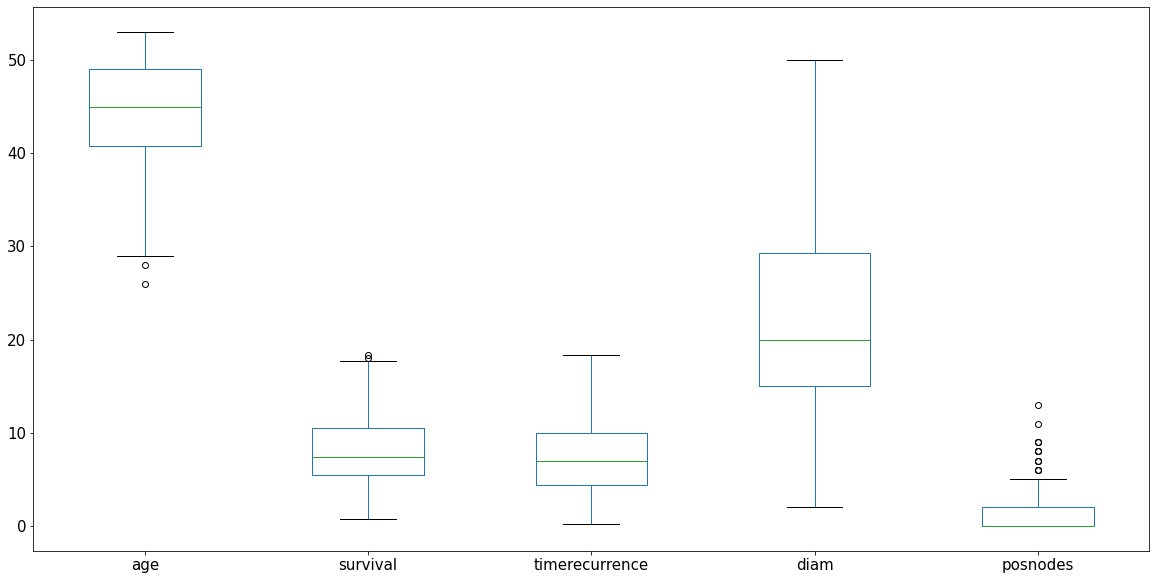

In [30]:
#Check for outliers for continuous variables - except gene expresion levels
plt.figure(figsize=(20,10))
boxplot = nki_bc.boxplot(column = ['age', 'survival', 'timerecurrence', 'diam', 'posnodes'], grid=False, fontsize=15)

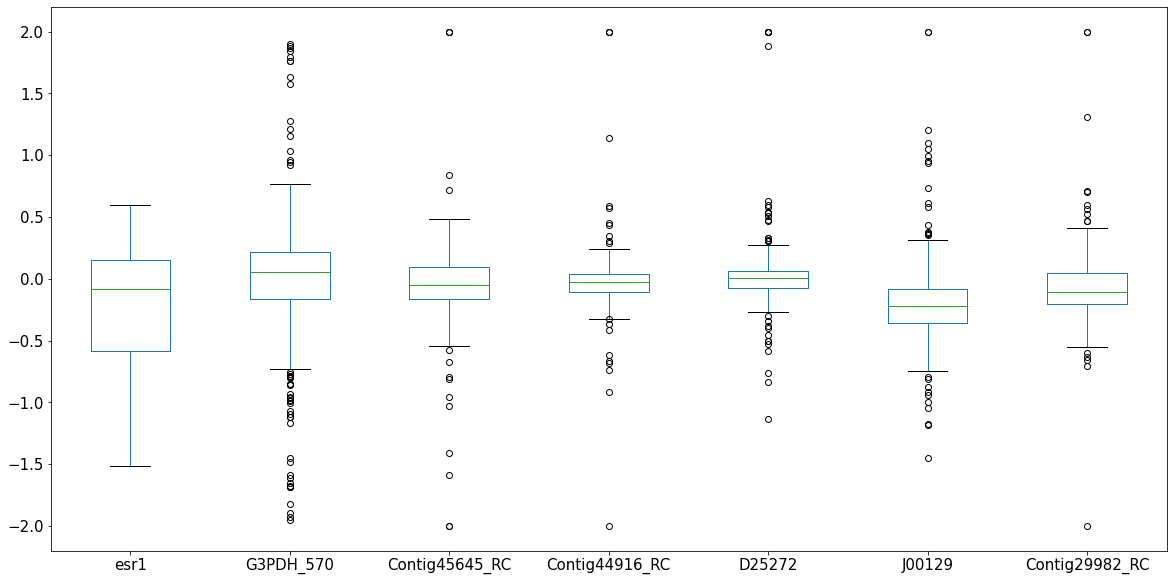

In [32]:
#Check for outliers for a few gene expresion levels
plt.figure(figsize=(20,10))
boxplot = nki_bc.boxplot(column = ['esr1', 'G3PDH_570', 'Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129', 'Contig29982_RC'], grid=False, fontsize=15)

### While the above graph displays high variation in gene expression levels, the range is consistently between 2 and -2. This is based on an intensity ratio to that of a reference pool.